1. What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?

    - Type 1 Error ( False Positive )
       - Rejecting the null hypothesis (H₀) when it is actually true.

       Impact on decision making:
         - Lower α → fewer false positives but harder to detect real effects.
         - Higher α → more false positives.

    - Type 2 Error ( False Negative )
       - Failing to reject the null hypothesis when it is actually false.

       Impact on decision making:
         - High β → more false negatives (you miss real effects).
         - Increasing sample size reduces β.

2. What is the P-value in hypothesis testing, and how should it be interpreted
in the context of the null hypothesis?

     - The p-value is the probability of getting a result at least as extreme as the one observed in your sample, assuming the null hypothesis is true.

       How to Interpret the P-value in the context of null hypothesis:

         1. Small P-value (≤ α)
           - Data is very unlikely under H₀
           - Strong evidence against H₀
           - You reject the null hypothesis

        2.  Large P-value (> α)
           - Data is not unusual under H₀
           - Weak evidence against H₀
           - You fail to reject H₀ (you do NOT accept it — you just don’t have enough evidence)

           


3. Explain the difference between a Z-test and a T-test, including when to use
each?

   - Z - Test

      - Population SD is Known.
      - Sample size (n>=30).
      - Used when sample variance is stable.

      When to use Z-Test:
        - Population standard deviation is known
        - Sample size is 30 or more
        - Data is normally distributed or sample is large enough to rely on Central Limit Theorem

   - T - Test

      - Population SD is unknown.
      - Sample size (n<30).
      - Used when sample variance has more variable.

      When to use T-Test:
        - Population σ unknown
        - Sample size less than 30
        - Data is approximately normally distributed

4. What is a confidence interval, and how does the margin of error influence
its width and interpretation?

       - A confidence interval is a range of values calculated from sample data that estimates the unknown population parameter with a certain confidence level (like 90%, 95%, or 99%).

       Margin of Error Controls the Width of the Confidence Interval:

         - CI = Estimate ± Margin of
         - Bigger Margin of Error → Wider Interval
         - Smaller Margin of Error → Narrower Interval

       How It Affects Interpretation:
         
         - If MoE is LARGE :-
            - The interval is wide
            - You are less certain about the exact value
            - Shows high variability or small sample size

         - If MoE is SMALL :-
            - The interval is narrow
            - You have a more precise estimate
            - Shows low variability or large sample size

5. Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?

       - Purpose of an ANOVA Test:
          - ANOVA (Analysis of Variance) is used to determine whether three or more group means are significantly different from each other.
          - To test if at least one group mean differs from the others.
          - It compares variance between groups versus variance within groups.

       - Assumptions of ANOVA:
          - Independence of Observations
            - Each data point must be independent of others.
          - Normality
            - Data in each group should be approximately normally distributed.
          - Homogeneity of Variances (Equal Variances)
            - All groups should have similar variance.


       - How ANOVA Extends Hypothesis Testing Beyond Two Groups:
          - ANOVA calculates two types of variance:
            - Between-group variance (how far group means differ)
            - Within-group variance (how spread out data is inside each group)
            - ANOVA generalizes the t-test by using variance instead of mean difference directly.     

6. Write a Python program to perform a one-sample Z-test and interpret the
result for a given dataset?



In [2]:
import numpy as np
from statsmodels.stats.weightstats import ztest

def perform_one_sample_ztest(data, population_mean, alpha=0.05):

    # Convert data to a numpy array for calculations
    sample_data = np.array(data)

    # Perform the Z-test
    z_statistic, p_value = ztest(sample_data, value=population_mean)

    # Interpret the results
    interpretation = ""
    if p_value < alpha:
        interpretation = (
            f"Reject the null hypothesis (H0): "
            f"The sample mean is significantly different from the population mean ({population_mean})."
        )
    else:
        interpretation = (
            f"Fail to reject the null hypothesis (H0): "
            f"There is no significant evidence that the sample mean differs from the population mean ({population_mean})."
        )

    return z_statistic, p_value, interpretation

# Example Usage:
if __name__ == "__main__":
    # Sample data (e.g., scores of students)
    sample_scores = [78, 85, 82, 90, 75, 88, 92, 79, 81, 87, 83, 86, 91, 77, 84]

    # Hypothesized population mean (e.g., average score for all students)
    hypothesized_population_mean = 80

    # Significance level
    alpha_level = 0.05

    # Perform the Z-test and get the results
    z_stat, p_val, interpretation_result = perform_one_sample_ztest(
        sample_scores, hypothesized_population_mean, alpha_level
    )

    print(f"Sample Data: {sample_scores}")
    print(f"Hypothesized Population Mean (μ0): {hypothesized_population_mean}")
    print(f"Significance Level (α): {alpha_level}")
    print(f"\nZ-Statistic: {z_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")
    print(f"Interpretation: {interpretation_result}")

Sample Data: [78, 85, 82, 90, 75, 88, 92, 79, 81, 87, 83, 86, 91, 77, 84]
Hypothesized Population Mean (μ0): 80
Significance Level (α): 0.05

Z-Statistic: 2.8604
P-Value: 0.0042
Interpretation: Reject the null hypothesis (H0): The sample mean is significantly different from the population mean (80).


7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using
NumPy and plot the histogram?



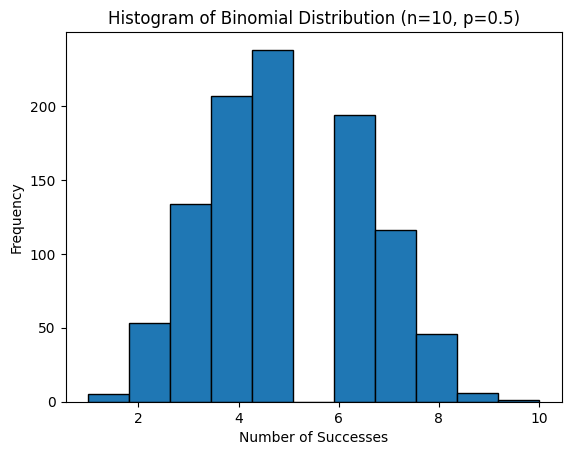

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate dataset from a binomial distribution (n = 10, p = 0.5)
np.random.seed(42)   # for reproducibility
data = np.random.binomial(n=10, p=0.5, size=1000)

# Plot histogram
plt.hist(data, bins=11, edgecolor='black')
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Histogram of Binomial Distribution (n=10, p=0.5)")
plt.show()


8. Generate multiple samples from a non-normal distribution and implement
the Central Limit Theorem using Python?

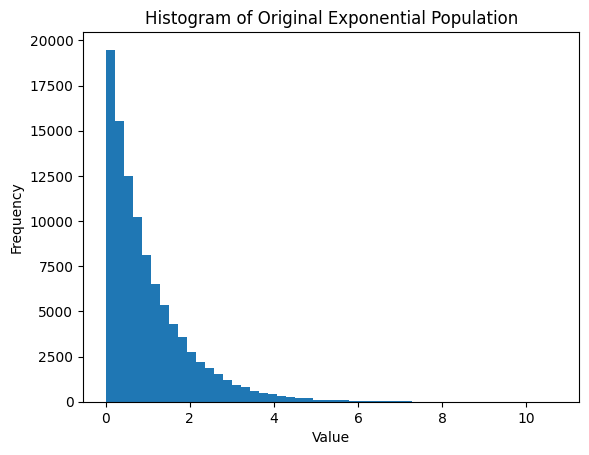

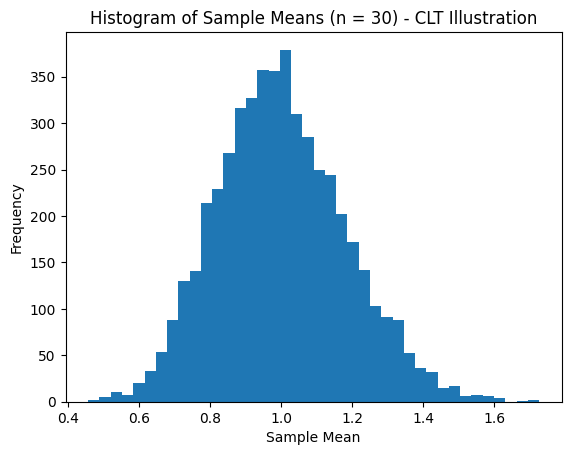

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate data from a clearly non-normal distribution (Exponential)
np.random.seed(0)          # for reproducibility
population_size = 100_000
population = np.random.exponential(scale=1.0, size=population_size)

# 2. Draw many samples and compute their means
n = 30              # sample size for each sample
num_samples = 5000  # how many samples to draw

sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=n, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# 3. Plot histogram of the original (non-normal) population
plt.hist(population, bins=50)
plt.title("Histogram of Original Exponential Population")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 4. Plot histogram of the sampling distribution of the mean
plt.hist(sample_means, bins=40)
plt.title("Histogram of Sample Means (n = 30) - CLT Illustration")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


9. Write a Python function to calculate and visualize the confidence interval
for a sample mean?

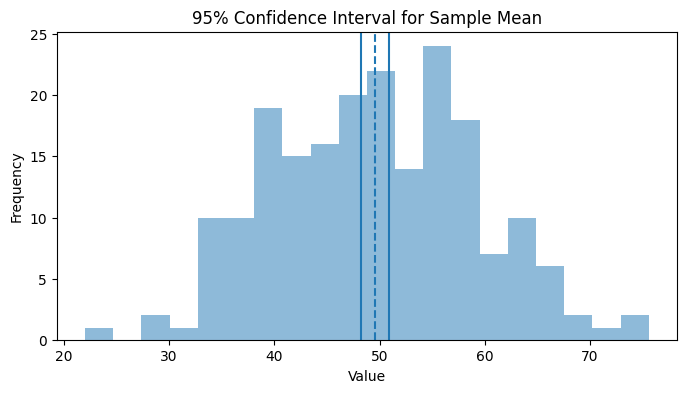

(np.float64(49.590737426674586),
 (np.float64(48.25476025831896), np.float64(50.92671459503021)))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm

def plot_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # Z-value for confidence level
    z = norm.ppf((1 + confidence) / 2)

    # Margin of error
    moe = z * (std / sqrt(n))

    lower = mean - moe
    upper = mean + moe

    # Visualization
    plt.figure(figsize=(8, 4))
    plt.axvline(mean, linestyle='--')
    plt.axvline(lower)
    plt.axvline(upper)
    plt.hist(data, bins=20, alpha=0.5)
    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

    return mean, (lower, upper)

# Example usage
data_example = np.random.normal(loc=50, scale=10, size=200)
plot_confidence_interval(data_example)


10. Perform a Chi-square goodness-of-fit test using Python to compare
observed and expected distributions, and explain the outcome?


In [6]:
from scipy.stats import chisquare
import numpy as np

# Observed frequencies from a sample
observed_frequencies = np.array([25, 30, 20, 15, 10])

# Expected frequencies based on a hypothesized distribution
# For example, if we expect a uniform distribution across 5 categories with a total of 100 observations
expected_frequencies = np.array([20, 20, 20, 20, 20])

# Perform the Chi-square goodness-of-fit test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-square statistic: {chi2_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05 # Significance level

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The observed distribution is significantly different from the expected distribution.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The observed distribution does not significantly differ from the expected distribution.")

Chi-square statistic: 12.50
P-value: 0.0140
Conclusion: Reject the null hypothesis. The observed distribution is significantly different from the expected distribution.
